# Маркетинговый анализ пользователей сервиса по доставке продуктов

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Столбцы" data-toc-modified-id="Столбцы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Столбцы</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Тип-данных" data-toc-modified-id="Тип-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тип данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-RR-по-месяцам" data-toc-modified-id="Анализ-RR-по-месяцам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ RR по месяцам</a></span></li><li><span><a href="#Выделение-сегментов" data-toc-modified-id="Выделение-сегментов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выделение сегментов</a></span></li><li><span><a href="#Анализ-стоимости-заказа" data-toc-modified-id="Анализ-стоимости-заказа-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ стоимости заказа</a></span><ul class="toc-item"><li><span><a href="#Анализ-распределения-стоимостей-заказов-по-категориям" data-toc-modified-id="Анализ-распределения-стоимостей-заказов-по-категориям-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Анализ распределения стоимостей заказов по категориям</a></span></li><li><span><a href="#Анализ-удержания-пользователей-по-категориям-стоимостей-заказов" data-toc-modified-id="Анализ-удержания-пользователей-по-категориям-стоимостей-заказов-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Анализ удержания пользователей по категориям стоимостей заказов</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span></li></ul></div>

## Описание исследования

Есть база данных пользователей сервиса доставки продуктов из магазина за 2021 год. База состоит из данных с общей информацией по заказам и клиентам сервиса: время, сумма заказов, тип оплаты и др.

**Цель** — сформировать рекомендации по привлечению и удержанию пользователей.

**Задачи:**
- Проанализировать RR по ключевым месяцам (март, май, июль)
- Сегментировать пользователей
- Выделить основной сегмент и дополнительные

Ход работы:
- Загрузка данных
- Предобработка данных
- Исследовательский анализ
- Общий вывод и рекомендации


## Загрузка данных

In [1]:
#Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Загружаем датасет1
orders_21 = pd.read_csv('/Users/dasha/Downloads/Заказы21.csv')

In [3]:
orders_21.info()
orders_21.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133432 entries, 0 to 133431
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Номер 
заказа                               133432 non-null  int64  
 1   Филиал                                      133432 non-null  object 
 2   Платформа                                   133432 non-null  object 
 3   Оценка заказа                               133432 non-null  int64  
 4   Статус                                      133432 non-null  object 
 5   Дата 
создания 
заказа                      133432 non-null  object 
 6   Время 
создания 
заказа                     133432 non-null  object 
 7   Время 
приема 
заказа                       133403 non-null  object 
 8   Тип доставки                                133426 non-null  object 
 9   Указаное 
дата 
доставки                    133432 non-null  object 
 

,Номер \nзаказа,Филиал,Платформа,Оценка заказа,Статус,Дата \nсоздания \nзаказа,Время \nсоздания \nзаказа,Время \nприема \nзаказа,Тип доставки,Указаное \nдата \nдоставки,...,"Минимальная \nсумма \nдоставки, сумы",Оплата через\nсистему\nStripe ($),Оплата через\nсистему\nOcto (sum),Всего\nоплачено\nс картой,Время \nзагрузки чека,Id Сборщика,ID Доставщика,Номер \nклиента,Район \nдоставки,Номер \nадреса доставки
0,471057,Юнусобод,iOS,0,Доставлено,26-12-2020,18:51,08:45,По расписанию,30-01-2021,...,15000,0,624020,624020,30-01-2021 15:14,1.0,1.0,48429363056,Шайхантахурский район,3995964031191
1,472573,Сергели,Win32,0,Доставлено,29-12-2020,15:13,08:14,По расписанию,04-01-2021,...,15000,0,0,0,04-01-2021 10:01,2.0,2.0,2996136003341,Сергелийский район,3994850040891
2,473587,Файзабад,Android,5,Доставлено,30-12-2020,22:42,08:46,По расписанию,03-01-2021,...,15000,0,350431,350431,03-01-2021 09:38,3.0,3.0,40424143817,Яшнабадский район,3995916514455


В данных 28 столбцов и 133432. В некоторых столбцах есть пропуски. Типы данных: float64(3), int64(5), object(20).

## Предобработка данных

### Столбцы

Для удобства приведем названия столбцов к змеиному регистру.

In [4]:
orders_21.columns.tolist()

['Номер \nзаказа',
 'Филиал',
 'Платформа',
 'Оценка заказа',
 'Статус',
 'Дата \nсоздания \nзаказа ',
 'Время \nсоздания \nзаказа',
 'Время \nприема \nзаказа',
 'Тип доставки',
 'Указаное \nдата \nдоставки',
 'Указаное \nвремя \nдоставки',
 'Фактическое \nвремя \nдоставки',
 'Опоздание',
 'Статус \nоплаты',
 'Метод \nоплаты',
 'Тип карты',
 'Стоимость товаров\nпосле формирование, сумы',
 'Сумма \nпо чеку. сумы',
 'Минимальная \nсумма \nдоставки, сумы',
 'Оплата через\nсистему\nStripe ($)',
 'Оплата через\nсистему\nOcto (sum)',
 'Всего\nоплачено\nс картой',
 'Время \nзагрузки чека',
 'Id Сборщика',
 'ID Доставщика',
 'Номер \nклиента',
 'Район \nдоставки',
 'Номер \nадреса доставки']

In [5]:
orders_21 = orders_21.rename(
    columns={'Номер \nзаказа': 'order_number',
            'Филиал': 'filial',
            'Платформа': 'platform',
            'Оценка заказа': 'order_score',
            'Статус': 'status',
            'Дата \nсоздания \nзаказа ': 'dt_create_order',
            'Время \nсоздания \nзаказа': 'tm_create_order',
            'Время \nприема \nзаказа': 'tm_accept_order',
            'Тип доставки': 'delivery_type',
            'Указаное \nдата \nдоставки': 'dt_delivery_suitable',
            'Указаное \nвремя \nдоставки': 'tm_delivery_suitable',
            'Фактическое \nвремя \nдоставки': 'tm_fact_delivery', 
            'Опоздание': 'delay',
            'Статус \nоплаты': 'payment_status',
            'Метод \nоплаты': 'payment_type',
            'Тип карты': 'card_type',
            'Стоимость товаров\nпосле формирование, сумы': 'total_price_sums',
            'Сумма \nпо чеку. сумы': 'total_price_receipt_sums',
            'Минимальная \nсумма \nдоставки, сумы': 'min_price_delivery_sums',
            'Оплата через\nсистему\nStripe ($)': 'payment_stripe_dl',
            'Оплата через\nсистему\nOcto (sum)': 'payment_octo_sums',
            'Всего\nоплачено\nс картой': 'total_payment_card',
            'Время \nзагрузки чека': 'dt_receipt',
            'Id Сборщика': 'id_collector',
            'ID Доставщика': 'id_deliveryman',
            'Номер \nклиента': 'id_client',
            'Район \nдоставки': 'district',
            'Номер \nадреса доставки': 'id_district'}
)
orders_21.head(5)


,order_number,filial,platform,order_score,status,dt_create_order,tm_create_order,tm_accept_order,delivery_type,dt_delivery_suitable,...,min_price_delivery_sums,payment_stripe_dl,payment_octo_sums,total_payment_card,dt_receipt,id_collector,id_deliveryman,id_client,district,id_district
0,471057,Юнусобод,iOS,0,Доставлено,26-12-2020,18:51,08:45,По расписанию,30-01-2021,...,15000,0,624020,624020,30-01-2021 15:14,1.0,1.0,48429363056,Шайхантахурский район,3995964031191
1,472573,Сергели,Win32,0,Доставлено,29-12-2020,15:13,08:14,По расписанию,04-01-2021,...,15000,0,0,0,04-01-2021 10:01,2.0,2.0,2996136003341,Сергелийский район,3994850040891
2,473587,Файзабад,Android,5,Доставлено,30-12-2020,22:42,08:46,По расписанию,03-01-2021,...,15000,0,350431,350431,03-01-2021 09:38,3.0,3.0,40424143817,Яшнабадский район,3995916514455
3,473792,Сергели,iOS,5,Доставлено,31-12-2020,11:29,08:11,По расписанию,05-01-2021,...,15000,0,635596,635596,05-01-2021 12:46,4.0,2.0,57756661892,Сергелийский район,77008882519
4,473798,Shedevr,Android,0,Доставлено,31-12-2020,11:44,09:59,По расписанию,02-01-2021,...,15000,0,0,146020,02-01-2021 11:46,5.0,3.0,2996727962468,Юнусабадский район,3995637283287


In [6]:
orders_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133432 entries, 0 to 133431
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_number              133432 non-null  int64  
 1   filial                    133432 non-null  object 
 2   platform                  133432 non-null  object 
 3   order_score               133432 non-null  int64  
 4   status                    133432 non-null  object 
 5   dt_create_order           133432 non-null  object 
 6   tm_create_order           133432 non-null  object 
 7   tm_accept_order           133403 non-null  object 
 8   delivery_type             133426 non-null  object 
 9   dt_delivery_suitable      133432 non-null  object 
 10  tm_delivery_suitable      133432 non-null  object 
 11  tm_fact_delivery          133371 non-null  object 
 12  delay                     133371 non-null  float64
 13  payment_status            133432 non-null  o

### Пропуски

In [7]:
#Посмотрим в каких столбцах больше всего пропусков данных
pd.DataFrame(round(orders_21.isna().mean()*100,))

,0
order_number,0.0
filial,0.0
platform,0.0
order_score,0.0
status,0.0
dt_create_order,0.0
tm_create_order,0.0
tm_accept_order,0.0
delivery_type,0.0
dt_delivery_suitable,0.0


In [8]:
#Проверим какие значения в столбце с типом карты
orders_21['card_type'].unique()

array(['Visa', nan, 'Uzcard', 'MasterCard', 'HumoCard'], dtype=object)

Более 50% пропусков в столбце с картами. Возможно пользователи оплачивали наличными при получении заказа.

In [9]:
#Заменим нули на Nan
def find_0(column):
    orders_21.loc[orders_21[column] == 0, [column]] = float('nan')

In [10]:
find_0('order_score') 

In [11]:
find_0('total_price_sums') 

In [12]:
find_0('total_price_receipt_sums')

In [13]:
find_0('min_price_delivery_sums')

In [14]:
find_0('payment_stripe_dl')

In [15]:
find_0('payment_stripe_dl')

In [16]:
find_0('payment_octo_sums')

In [17]:
find_0('total_payment_card')

In [18]:
find_0('id_collector')

In [19]:
find_0('id_deliveryman')

In [20]:
find_0('id_client')

In [21]:
find_0('id_district')

In [22]:
#Посмотрим в каких столбцах больше всего пропусков данных теперь
pd.DataFrame(round(orders_21.isna().mean()*100,)).sort_values(by=0, ascending=False)

,0
order_score,77.0
payment_stripe_dl,75.0
card_type,53.0
payment_octo_sums,45.0
total_payment_card,13.0
min_price_delivery_sums,6.0
district,5.0
dt_receipt,3.0
id_collector,1.0
order_number,0.0


<div class="alert alert-warning">
    <b>⚠️ Важно:</b>
    
Больше всего пропусков в столбце в оценками заказа — 77%. По какой-то причине пользователи не ставят оценки: им не нравится доставка/заказ или они не знают как это сделать? Есть вероятнось, что здесь играет человеческий фактор. В любом случае вопрос для дальнейшего глубокого анализа.
</div>

Удалим пропуски в столбцах, которые имеют не более 5%. Они не критичны для дальнейшей работы.

In [23]:
orders_21 = orders_21.dropna(subset=['district', 
                                     'dt_receipt', 
                                     'id_collector', 
                                     'id_deliveryman',
                                     'tm_accept_order',
                                     'delivery_type',
                                     'id_district']).reset_index(drop=True)

In [24]:
#Вернем нули, чтобы при рассчетах Nan не мешал нам
orders_21[['order_score', 
           'district', 
           'dt_receipt', 
           'id_collector', 
           'payment_stripe_dl', 
           'payment_octo_sums', 
           'min_price_delivery_sums',
           'total_payment_card',
           'total_price_sums']] = orders_21[['order_score', 
                                                    'district', 
                                                    'dt_receipt', 
                                                    'id_collector', 
                                                    'payment_stripe_dl', 
                                                    'payment_octo_sums', 
                                                    'min_price_delivery_sums',
                                                    'total_payment_card',
                                                    'total_price_sums']].fillna(0)

In [25]:
orders_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122335 entries, 0 to 122334
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_number              122335 non-null  int64  
 1   filial                    122335 non-null  object 
 2   platform                  122335 non-null  object 
 3   order_score               122335 non-null  float64
 4   status                    122335 non-null  object 
 5   dt_create_order           122335 non-null  object 
 6   tm_create_order           122335 non-null  object 
 7   tm_accept_order           122335 non-null  object 
 8   delivery_type             122335 non-null  object 
 9   dt_delivery_suitable      122335 non-null  object 
 10  tm_delivery_suitable      122335 non-null  object 
 11  tm_fact_delivery          122295 non-null  object 
 12  delay                     122295 non-null  float64
 13  payment_status            122335 non-null  o

### Тип данных

В датасете есть столбцы, у которых нужно изменить тип данных на datetime.

In [26]:
#Даты
orders_21['dt_create_order'] = pd.to_datetime(orders_21['dt_create_order'], format='%d-%m-%Y')
orders_21['dt_delivery_suitable'] = pd.to_datetime(orders_21['dt_delivery_suitable'], format='%d-%m-%Y')
orders_21['dt_receipt'] = pd.to_datetime(orders_21['dt_receipt'], format='%d-%m-%Y %H:%M')

#Время
orders_21['tm_create_order'] = pd.to_datetime(orders_21['tm_create_order'], format='%H:%M')
orders_21['tm_accept_order'] = pd.to_datetime(orders_21['tm_accept_order'], format='%H:%M')
orders_21['tm_accept_order'] = pd.to_datetime(orders_21['tm_accept_order'], format='%H:%M')
orders_21['tm_delivery_suitable'] = pd.to_datetime(orders_21['tm_delivery_suitable'], format='%H:%M')
orders_21['tm_fact_delivery'] = pd.to_datetime(orders_21['tm_fact_delivery'], format='%H:%M')



In [27]:
#Строковые значения переведем в числовые
orders_21['order_score'] = orders_21['order_score'].astype('int')

orders_21['min_price_delivery_sums'] = orders_21['min_price_delivery_sums'].astype('int')
orders_21['payment_stripe_dl'] = pd.to_numeric(orders_21['payment_stripe_dl'], errors='coerce')
orders_21['payment_octo_sums'] = pd.to_numeric(orders_21['payment_octo_sums'], errors='coerce')
orders_21['total_payment_card'] = pd.to_numeric(orders_21['total_payment_card'], errors='coerce')
orders_21['id_collector'] = orders_21['id_collector'].astype('int')
orders_21['id_deliveryman'] = orders_21['id_deliveryman'].astype('int')
orders_21['id_client'] = orders_21['id_client'].astype('int')
orders_21['id_district'] = pd.to_numeric(orders_21['id_district'], errors='coerce')



In [28]:
orders_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122335 entries, 0 to 122334
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_number              122335 non-null  int64         
 1   filial                    122335 non-null  object        
 2   platform                  122335 non-null  object        
 3   order_score               122335 non-null  int64         
 4   status                    122335 non-null  object        
 5   dt_create_order           122335 non-null  datetime64[ns]
 6   tm_create_order           122335 non-null  datetime64[ns]
 7   tm_accept_order           122335 non-null  datetime64[ns]
 8   delivery_type             122335 non-null  object        
 9   dt_delivery_suitable      122335 non-null  datetime64[ns]
 10  tm_delivery_suitable      122335 non-null  datetime64[ns]
 11  tm_fact_delivery          122295 non-null  datetime64[ns]
 12  de

### Дубликаты

In [29]:
orders_21.duplicated().sum()

0

Явных дубликатов нет.

In [30]:
#Проверка неявных дубликатов
orders_21['filial'].unique()

array(['Юнусобод', 'Сергели', 'Файзабад', 'Shedevr', 'Салом', 'Караташ',
       'Бунёдкор', 'Сарыкулька', 'Чиланзар', 'Авиасозлар', 'Buxoro',
       'Беруний', 'Samarqand', 'INTEGRO', 'Kohinur', 'Шедевр', 'Чирчик'],
      dtype=object)

Есть два филиала записанные кириллицей и латиницей — неявные дубликаты. Объеденим их.

In [31]:
orders_21['filial'] = orders_21['filial'].replace('Shedevr', 'Шедевр')
orders_21['filial'].unique()

array(['Юнусобод', 'Сергели', 'Файзабад', 'Шедевр', 'Салом', 'Караташ',
       'Бунёдкор', 'Сарыкулька', 'Чиланзар', 'Авиасозлар', 'Buxoro',
       'Беруний', 'Samarqand', 'INTEGRO', 'Kohinur', 'Чирчик'],
      dtype=object)

In [32]:
orders_21['platform'].unique()

array(['iOS', 'Win32', 'Android', 'MacIntel', 'Linux armv8l',
       'Linux armv7l', 'iPhone', 'Linux aarch64', 'iPad', 'Linux x86_64'],
      dtype=object)

In [33]:
orders_21['status'].unique()

array(['Доставлено'], dtype=object)

In [34]:
orders_21['delivery_type'].unique()

array(['По расписанию', 'Срочная'], dtype=object)

In [35]:
orders_21['payment_type'].unique()

array(['Онлайн карта', 'Наличными', 'Онлайн карта + Баллы', 'Баллами'],
      dtype=object)

In [36]:
orders_21['card_type'].unique()

array(['Visa', nan, 'Uzcard', 'MasterCard', 'HumoCard'], dtype=object)

In [37]:
orders_21['district'].unique()

array(['Шайхантахурский район', 'Сергелийский район', 'Яшнабадский район',
       'Юнусабадский район', 'Мирзо-Улугбекский район',
       'Чиланзарский район', 'Алмазарский район', 'Мирабадский район',
       'Учтепинский район', 'Яккасарайский район', 'Бектемирский район',
       ' Бухара', 'Бухара', 'Самарканд ', 'Чирчикский район'],
      dtype=object)

Бухара повторяется дважды.

In [38]:
orders_21['district'] = orders_21['district'].replace(' Бухара', 'Бухара')
orders_21['district'].unique()

array(['Шайхантахурский район', 'Сергелийский район', 'Яшнабадский район',
       'Юнусабадский район', 'Мирзо-Улугбекский район',
       'Чиланзарский район', 'Алмазарский район', 'Мирабадский район',
       'Учтепинский район', 'Яккасарайский район', 'Бектемирский район',
       'Бухара', 'Самарканд ', 'Чирчикский район'], dtype=object)

Данные подготовлены к анализу: почищены пропуски, изменены типы данных, проверены дубликаты.

## Исследовательский анализ

In [39]:
#Сначала посмотрим даты начала и окончания бора данных
orders_21['dt_create_order'].min()

Timestamp('2020-12-26 00:00:00')

In [40]:
orders_21['dt_create_order'].max()

Timestamp('2021-12-31 00:00:00')

В данных есть заказы за 2020 год, уберем их, так как нам нужны заказы за 2021 год.

In [41]:
orders_21 = orders_21.query('dt_create_order > "2020-12-31"').reset_index(drop=True)

In [42]:
orders_21['dt_create_order'].min()

Timestamp('2021-01-01 00:00:00')

### Анализ RR по месяцам

In [43]:
#Выделим первое посещение пользователя
dt_first = orders_21.groupby('id_client').agg({'dt_create_order': 'min'})
dt_first['dt_create_order'] = dt_first['dt_create_order'].dt.month
dt_first = dt_first.rename(columns={'dt_create_order': 'month_first_order'})
dt_first.head()

,month_first_order
id_client,
14239797104,4
14371608173,11
14390049134,5
14390106569,3
14390404712,1


In [44]:
#Выделим даты заказов
clients_orders = orders_21[['id_client', 'dt_create_order']]
clients_orders['dt_create_order'] = clients_orders['dt_create_order'].dt.month
clients_orders = clients_orders.rename(columns={'dt_create_order': 'month_order'})
clients_orders.head()

,id_client,month_order
0,2996805460517,1
1,2996709564593,1
2,2996710516916,1
3,2996700975179,1
4,2759620043621,1


In [45]:
#Объеденим таблицы для рассчета livetime
clients_orders = clients_orders.merge(dt_first, on='id_client', how='left')
clients_orders.head(5)

,id_client,month_order,month_first_order
0,2996805460517,1,1
1,2996709564593,1,1
2,2996710516916,1,1
3,2996700975179,1,1
4,2759620043621,1,1


In [46]:
#Высчитываем lifetime для пользователей
clients_orders['lifetime'] = (
    clients_orders['month_order'] - clients_orders['month_first_order']
)
clients_orders.head()

,id_client,month_order,month_first_order,lifetime
0,2996805460517,1,1,0
1,2996709564593,1,1,0
2,2996710516916,1,1,0
3,2996700975179,1,1,0
4,2759620043621,1,1,0


In [47]:
#Строим таблицу удержания
retention_group = clients_orders.pivot_table(
    index='month_first_order', columns='lifetime', values='id_client', aggfunc='nunique'
)
retention_group

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
1,4120.0,2530.0,2452.0,2284.0,2153.0,2129.0,2016.0,1741.0,1829.0,1725.0,1705.0,1659.0
2,1457.0,565.0,478.0,425.0,389.0,373.0,317.0,329.0,324.0,314.0,317.0,NaN
3,1312.0,407.0,329.0,268.0,272.0,216.0,202.0,242.0,216.0,220.0,NaN,NaN
4,1106.0,322.0,290.0,248.0,197.0,206.0,188.0,175.0,183.0,NaN,NaN,NaN
5,976.0,268.0,235.0,175.0,184.0,160.0,163.0,149.0,NaN,NaN,NaN,NaN
6,1060.0,310.0,190.0,172.0,161.0,142.0,137.0,NaN,NaN,NaN,NaN,NaN
7,1316.0,324.0,258.0,229.0,194.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN
8,716.0,212.0,144.0,120.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,879.0,241.0,195.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Считаем размеры когорт
cohort_size = clients_orders.groupby('month_first_order').agg({'id_client': 'nunique'})\
               .rename(columns={'id_client': 'cohort_size'})

cohort_size

,cohort_size
month_first_order,
1,4120
2,1457
3,1312
4,1106
5,976
6,1060
7,1316
8,716
9,879


In [49]:
#Объединяем размеры когорт и таблицу удержания
retention_rate = cohort_size.merge(
    retention_group, on='month_first_order', how='left'
).fillna(0)

retention_rate

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,,
1,4120,4120.0,2530.0,2452.0,2284.0,2153.0,2129.0,2016.0,1741.0,1829.0,1725.0,1705.0,1659.0
2,1457,1457.0,565.0,478.0,425.0,389.0,373.0,317.0,329.0,324.0,314.0,317.0,0.0
3,1312,1312.0,407.0,329.0,268.0,272.0,216.0,202.0,242.0,216.0,220.0,0.0,0.0
4,1106,1106.0,322.0,290.0,248.0,197.0,206.0,188.0,175.0,183.0,0.0,0.0,0.0
5,976,976.0,268.0,235.0,175.0,184.0,160.0,163.0,149.0,0.0,0.0,0.0,0.0
6,1060,1060.0,310.0,190.0,172.0,161.0,142.0,137.0,0.0,0.0,0.0,0.0,0.0
7,1316,1316.0,324.0,258.0,229.0,194.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0
8,716,716.0,212.0,144.0,120.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,879,879.0,241.0,195.0,174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Делим данные таблицы удержания на размеры когорт
retention_rate = retention_rate.div(
    retention_rate['cohort_size'], axis=0
).drop(columns=['cohort_size'])

retention_rate

,0,1,2,3,4,5,6,7,8,9,10,11
month_first_order,,,,,,,,,,,,
1,1.0,0.614078,0.595146,0.554369,0.522573,0.516748,0.489320,0.422573,0.443932,0.418689,0.413835,0.40267
2,1.0,0.387783,0.328071,0.291695,0.266987,0.256005,0.217570,0.225806,0.222375,0.215511,0.217570,0.00000
3,1.0,0.310213,0.250762,0.204268,0.207317,0.164634,0.153963,0.184451,0.164634,0.167683,0.000000,0.00000
4,1.0,0.291139,0.262206,0.224231,0.178119,0.186257,0.169982,0.158228,0.165461,0.000000,0.000000,0.00000
5,1.0,0.274590,0.240779,0.179303,0.188525,0.163934,0.167008,0.152664,0.000000,0.000000,0.000000,0.00000
6,1.0,0.292453,0.179245,0.162264,0.151887,0.133962,0.129245,0.000000,0.000000,0.000000,0.000000,0.00000
7,1.0,0.246201,0.196049,0.174012,0.147416,0.148176,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,1.0,0.296089,0.201117,0.167598,0.160615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,1.0,0.274175,0.221843,0.197952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


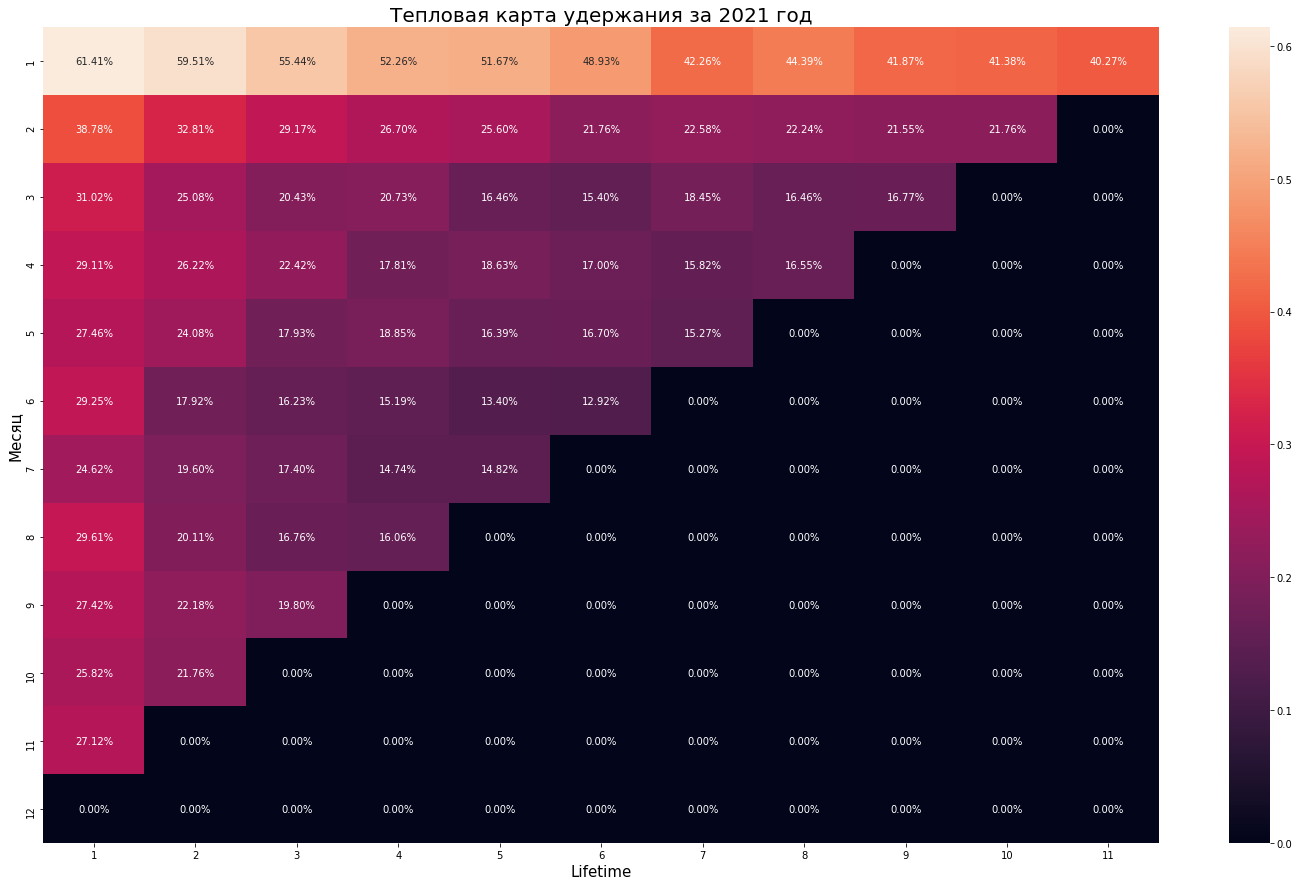

In [51]:
#Строим хитмэп
plt.figure(figsize=(25, 15)) 
sns.heatmap(
    retention_rate.drop(columns=[0]),
    annot=True,
    fmt='.2%'
)
plt.title('Тепловая карта удержания за 2021 год', fontsize=20)
plt.xlabel('Lifetime', fontsize=15)
plt.ylabel('Месяц', fontsize=15)

plt.show()

Пользователи, пришедшие в марте, почти в 2-2.5 раза хуже удерживаются по сравнению с январскими. 
На второй месяц использования мартовская когорта является 3-й по удержанию (31.02%), а к конццу года 5-й. К концу года всего 16,55% пользователей остались пользовователями приложения. С 3-го месяца использования приложения, количество пользователе резко падает, с 6-го выходит на плато.

Пользователи, пришедшие в мае, почти в 2.5-3 раза хуже удерживаются по сравнению с январскими. 
На второй месяц использования майская когорта является 6-й по удержанию(27,46%), а к конццу года 8-й. Количетсво пользователей сокращается равномернее, чем в марте. К концу года 15,27% пользователей продолжают использовать приложение.

Пользователи, пришедшие в июле имеют один из самый низкий процент удержания среди остальных когорт. На второй месяц 24,62%, на последний 14,82% - ниже только у июньской когорты.

Лучше всего пользователи удерживаются в январской когорте. Это **может быть** связано с несколькими причинами:
- высокий сервис обслуживания в первые дни нового года, который усиливает человеческий фактор (жить с комфортом).
- вероятно пользователи получили бонусы за использование приложения в январе, что позволило усилить лояльность в течние года.
- горизон анализа полный год, а значит, пользователи попали под все маркетинговые активности, что так же повлияло на их лояльность.

В целом под гонец года активность падает. Помесячные показатели удержания с марта по ноябрь отличаются на сильно друг от друга: от 1,5 до 5 процентных пунктов. В сравнении с этим январь и февраль почти в 2 раза выше.

**Рекомендации:**

Возможно пользователям не хвает стимуляции: пуши с **акционными предложениями только** в приложении. 

Можно возвращать пользователей за счет геймефикации, например, получи бонус дня или собери фишки.

<div class="alert alert-warning"> Так же важно изучить воронку пользователей в приложении: барьеры в покупке, сложность интерфейса, взаимосвязь с качетсвом заказов.

Так же нужно проанализировать маркетинговые активности: 
    
    Почему вначале года пришло почти в 5 раз больше пользователей, чем в конце?
    
    С чем связано падение новых пользователей в мае и с августа по декабрь?
</div>


### Выделение сегментов

Перед тем как выделить сегменты посмотрим на распределение показателей.

In [52]:
pd.set_option('max_columns', None)
orders_21.head()

,order_number,filial,platform,order_score,status,dt_create_order,tm_create_order,tm_accept_order,delivery_type,dt_delivery_suitable,tm_delivery_suitable,tm_fact_delivery,delay,payment_status,payment_type,card_type,total_price_sums,total_price_receipt_sums,min_price_delivery_sums,payment_stripe_dl,payment_octo_sums,total_payment_card,dt_receipt,id_collector,id_deliveryman,id_client,district,id_district
0,473851,Салом,Win32,0,Доставлено,2021-01-01,1900-01-01 02:52:00,1900-01-01 08:32:00,По расписанию,2021-01-02,1900-01-01 15:00:00,1900-01-01 13:23:00,-96.0,Оплачен,Наличными,NaN,178330.0,184730.00,15000,0.0,0.0,0.0,2021-01-02 12:51:00,6,18,2996805460517,Мирзо-Улугбекский район,3.995741e+12
1,473853,Караташ,Android,0,Доставлено,2021-01-01,1900-01-01 09:56:00,1900-01-01 08:17:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 10:55:00,-64.0,Оплачен,Онлайн карта,Uzcard,150390.0,150690.00,15000,0.0,0.0,185780.0,2021-01-02 10:11:00,13,10,2996709564593,Алмазарский район,3.995613e+12
2,473854,Салом,iOS,0,Доставлено,2021-01-01,1900-01-01 10:06:00,1900-01-01 10:30:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 11:59:00,0.0,Оплачен,Онлайн карта,Uzcard,144180.0,144180.00,15000,0.0,0.0,145680.0,2021-01-02 11:20:00,6,11,2996710516916,Мирзо-Улугбекский район,3.995614e+12
3,473855,Салом,MacIntel,0,Доставлено,2021-01-01,1900-01-01 10:06:00,1900-01-01 13:13:00,По расписанию,2021-01-02,1900-01-01 18:00:00,1900-01-01 16:21:00,-98.0,Оплачен,Онлайн карта,Uzcard,376038.0,375738.38,15000,0.0,0.0,422350.0,2021-01-02 15:33:00,9,18,2996700975179,Мирзо-Улугбекский район,3.995640e+12
4,473857,Сарыкулька,iOS,4,Доставлено,2021-01-01,1900-01-01 11:30:00,1900-01-01 08:43:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 11:13:00,-46.0,Оплачен,Онлайн карта,Visa,498663.0,498583.88,15000,0.0,533882.0,533882.0,2021-01-02 11:02:00,14,22,2759620043621,Мирабадский район,3.995640e+12


In [53]:
def hist(col, bin_c):
    orders_21[col].hist(bins=bin_c, figsize=(15,10))
    plt.xticks(rotation=45)
    return plt.show()

In [54]:
#Посмотрим распределение пользователей по филиалам
orders_21['filial'].nunique()

16

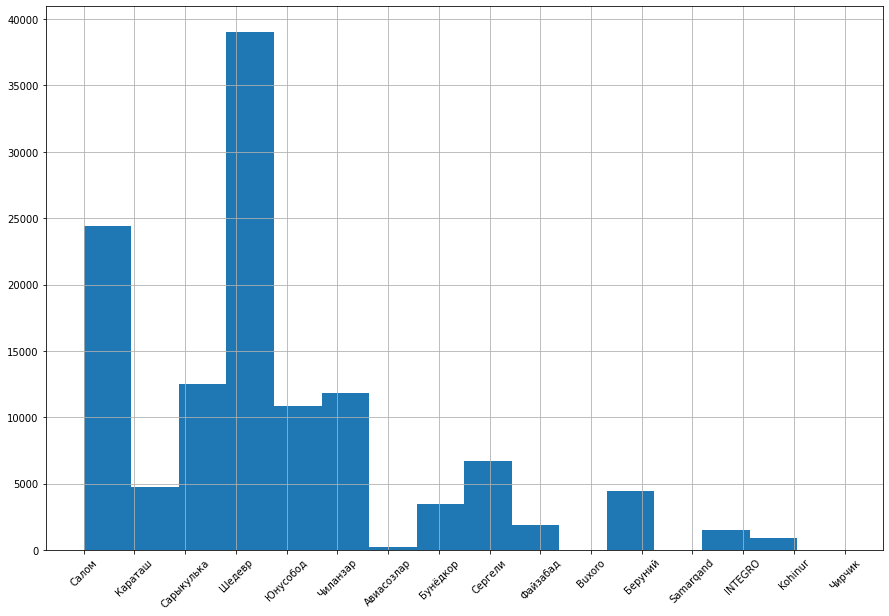

In [55]:
hist('filial', 16)

Больше всего заказов из филиалов: Салом и Shedevr. Меньше всего из дугих городов: Бухара, Самраканд и Чирчик.

In [56]:
#Посмортим распределениепользователей по районам
orders_21['district'].nunique()


14

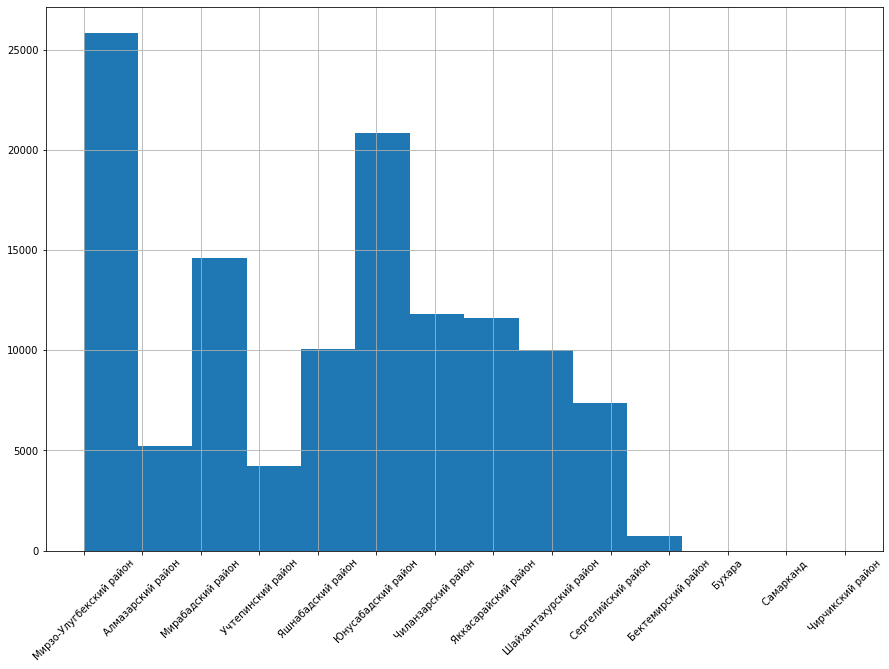

In [57]:
hist('district', 14)

Больше всего заказов из Мирзо-Улугбеского района и Юнусобадского. Меньше всего из других городов, а в Ташкенте из Сергелийского района.

In [58]:
#Посмотрим распределение пользователей по платформе
orders_21['platform'].nunique()

10

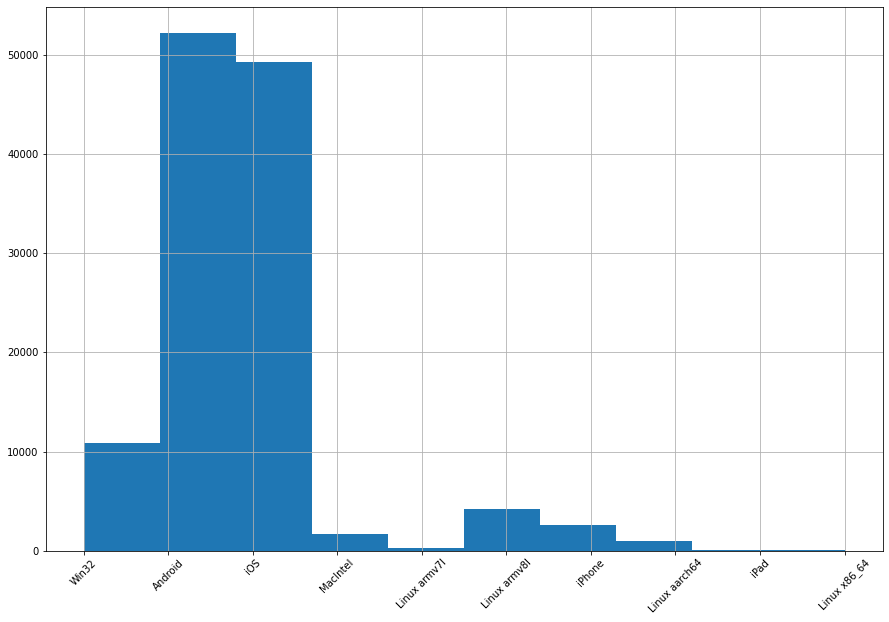

In [59]:
hist('platform', 10)

Больше всего заказов через Andriod и iOS. Меньше всего через Linux. Не понятно, что входит в iOS, так как отдельно выделен iPhone и iPad. Возможно Mac + iPhone и iPad или только Mac.

Можно рассмотреть эти 2 лидирующих сегмента по удержанию.

In [60]:
#Посмотрим распределение по времени заказа
orders_21['hour'] = orders_21['tm_create_order'].dt.hour

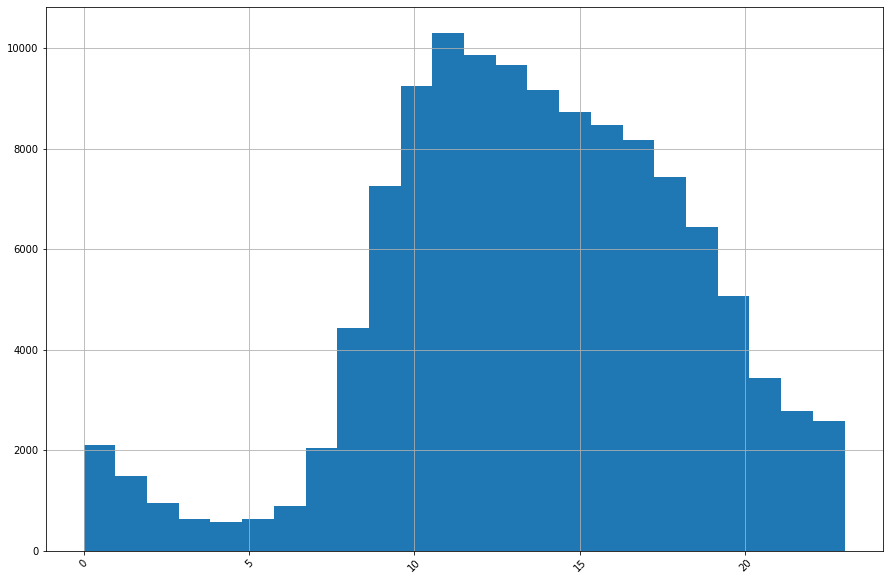

In [61]:
hist('hour', 24)

Чаще всего пользовтели заказывают в 11 утра, а меньше всего 5 утра.

In [62]:
#Смотрим, на какое время заказывают
orders_21['hour2'] = orders_21['tm_delivery_suitable'].dt.hour

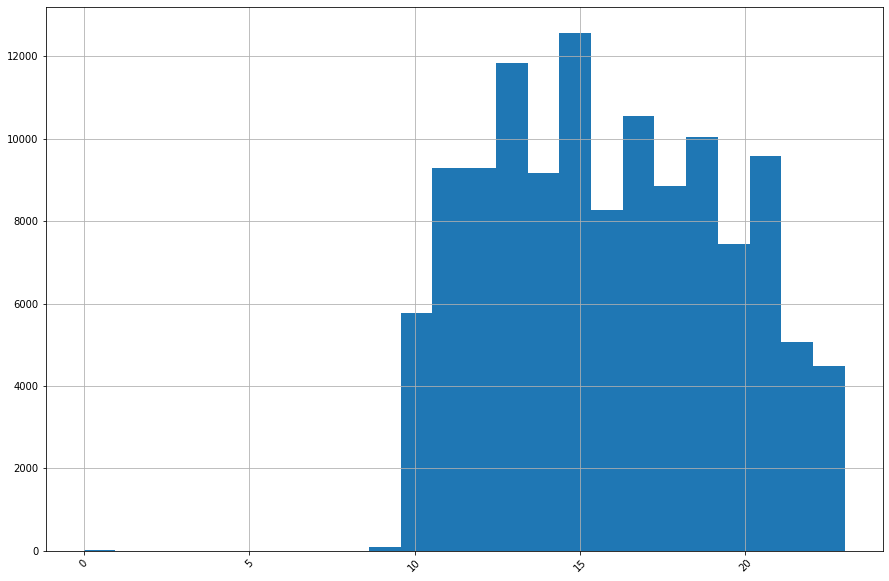

In [63]:
hist('hour2', 24)

Чаще всего пользователи заказывают доставку к 15 часам. Доставка к 00.00 - аномалия?

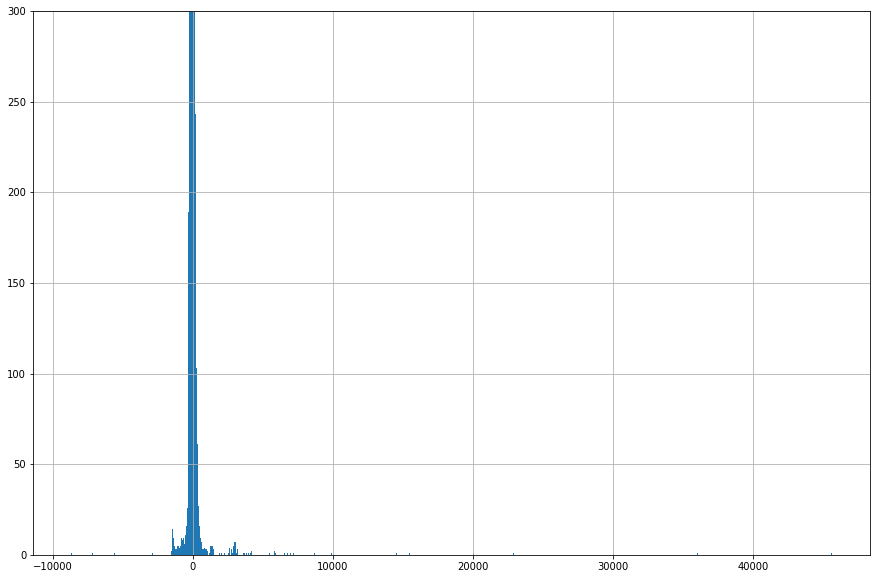

In [64]:
#Посмотрим распределение опозданий
orders_21['delay'].hist(bins=1000, figsize=(15,10))
plt.ylim(0, 300)
plt.show()

In [65]:
orders_21['month'] = orders_21['dt_create_order'].dt.month

In [66]:
orders_21['delay'].describe()

count    122279.000000
mean        -21.245831
std         236.244395
min       -8664.000000
25%         -44.000000
50%         -22.000000
75%          -5.000000
max       45669.000000
Name: delay, dtype: float64

Среднее и медиана почти одинаковые. Медиана больше среднего, значит распределение скошено вправо, хоть и не сильно. Все же хвост выбросов довольно длинный.

В среднем заказ доставляют на 21 минту раньше. В большнстве случаев доставка приезжает без опозданий.

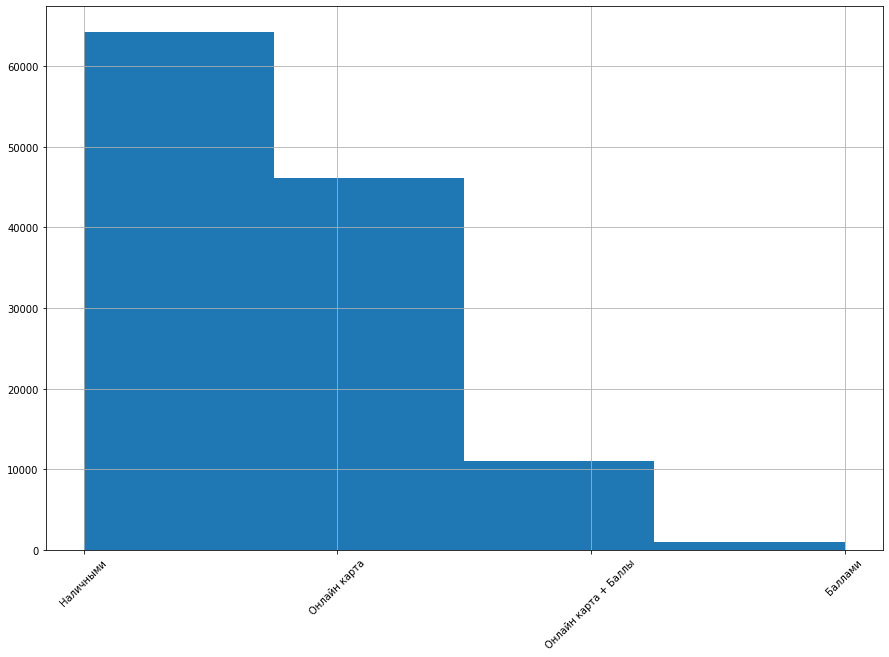

In [67]:
#Посмотрим распределение по типу оплаты
hist('payment_type', 4)

Чаще всего заказы оплачивают наличными.

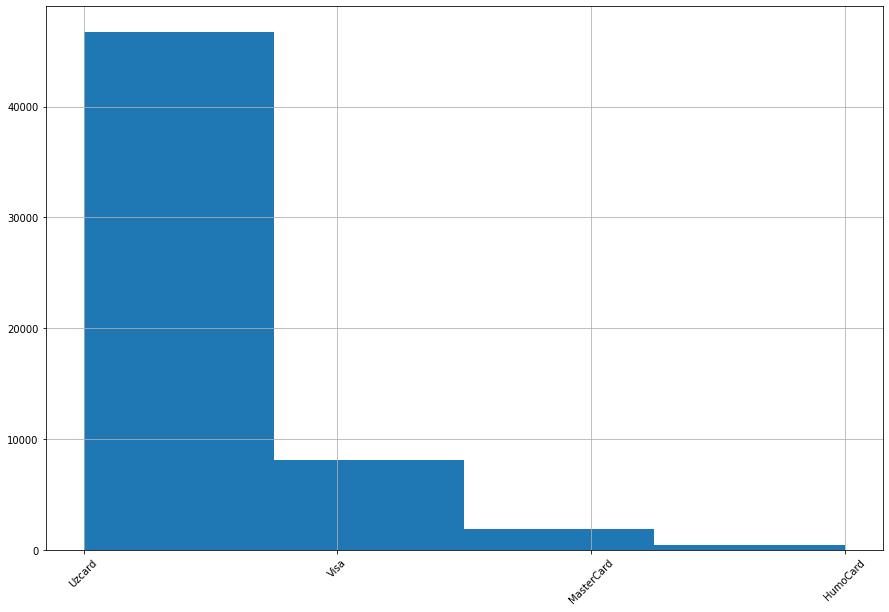

In [68]:
#Посмотрим распределение по типу карты
hist('card_type', 4)

Больше всего пользователей с Uzcard, меньше всего HumoCard.

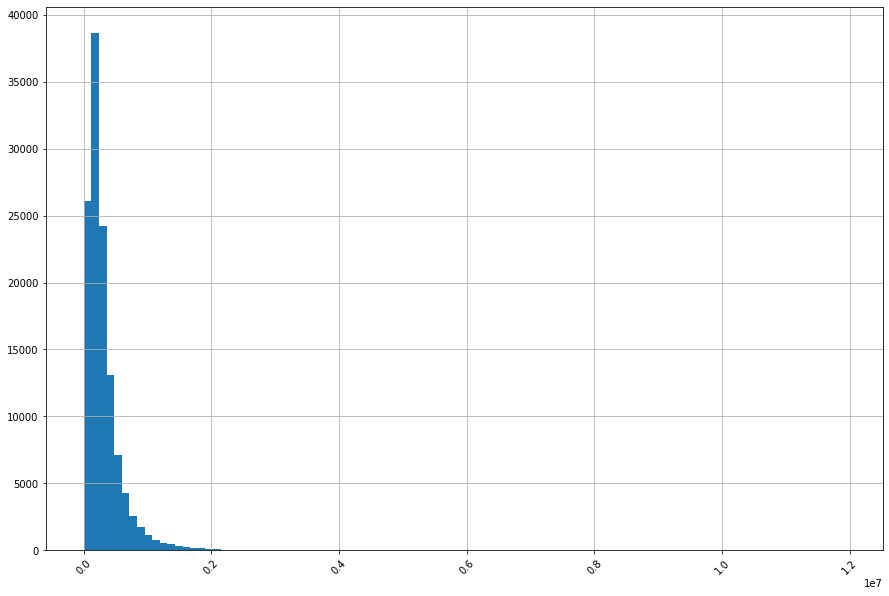

In [69]:
#Посмотрим распределение по стоимости заказов
hist('total_price_receipt_sums', 100)

In [70]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
orders_21['total_price_receipt_sums'].describe().to_frame()

,total_price_receipt_sums
count,122303
mean,312988
std,321094
min,2038
25%,133908
50%,227057
75%,378954
max,11920000


Среднее отлицается от медианы из-за больших выбросов. За среднее в дальнейшем будем принамить медиану.

Таким образом средний чек заказа — 227057 сумов. Большинство пользователей заказывают на сумму до 378954 сумов.

**Вывод**
На основе данных по распределению можно выделить следующие сегменты по следующим характеристикам:
- районы доставки
- способы оплаты
- виды карт
- тип ОС
- временя заказа
- время доствка
- задержка
- стоимость заказа

Мы для анализа возьмем стоимость заказа и рассмотрим, как она влияет на удержание.


### Анализ стоимости заказа

Для начала нам необходимо разделить стоимость заказа на категории, которые мы можем в дальнейшем сравнить. Для этого удалим выбросы и создадим категории.

In [71]:
q3 = orders_21['total_price_receipt_sums'].quantile(0.75) + 1.5*(orders_21['total_price_receipt_sums'].quantile(0.75) - orders_21['total_price_receipt_sums'].quantile(0.25))
print(f"Верхняя граница выбросов: {q3}")

Верхняя граница выбросов: 746522.9550000001


In [72]:
#Удалим выбросы
orders_21 = orders_21.query('total_price_receipt_sums <= 746523')

#### Анализ распределения стоимостей заказов по категориям

In [73]:
#Посмотрим в каком филиале стоимость заказов выше других
def box_plot(x, title, xl):

    plt.figure(figsize=(25, 15)) 
    sns.boxplot(x=x, y='total_price_receipt_sums', data=orders_21)
    plt.title('Распределение стоимости заказов по ' + title, fontsize=20)
    plt.xlabel(xl)
    plt.ylabel('Стоимость заказа')
    plt.xticks(rotation=45)
    return plt.show()  

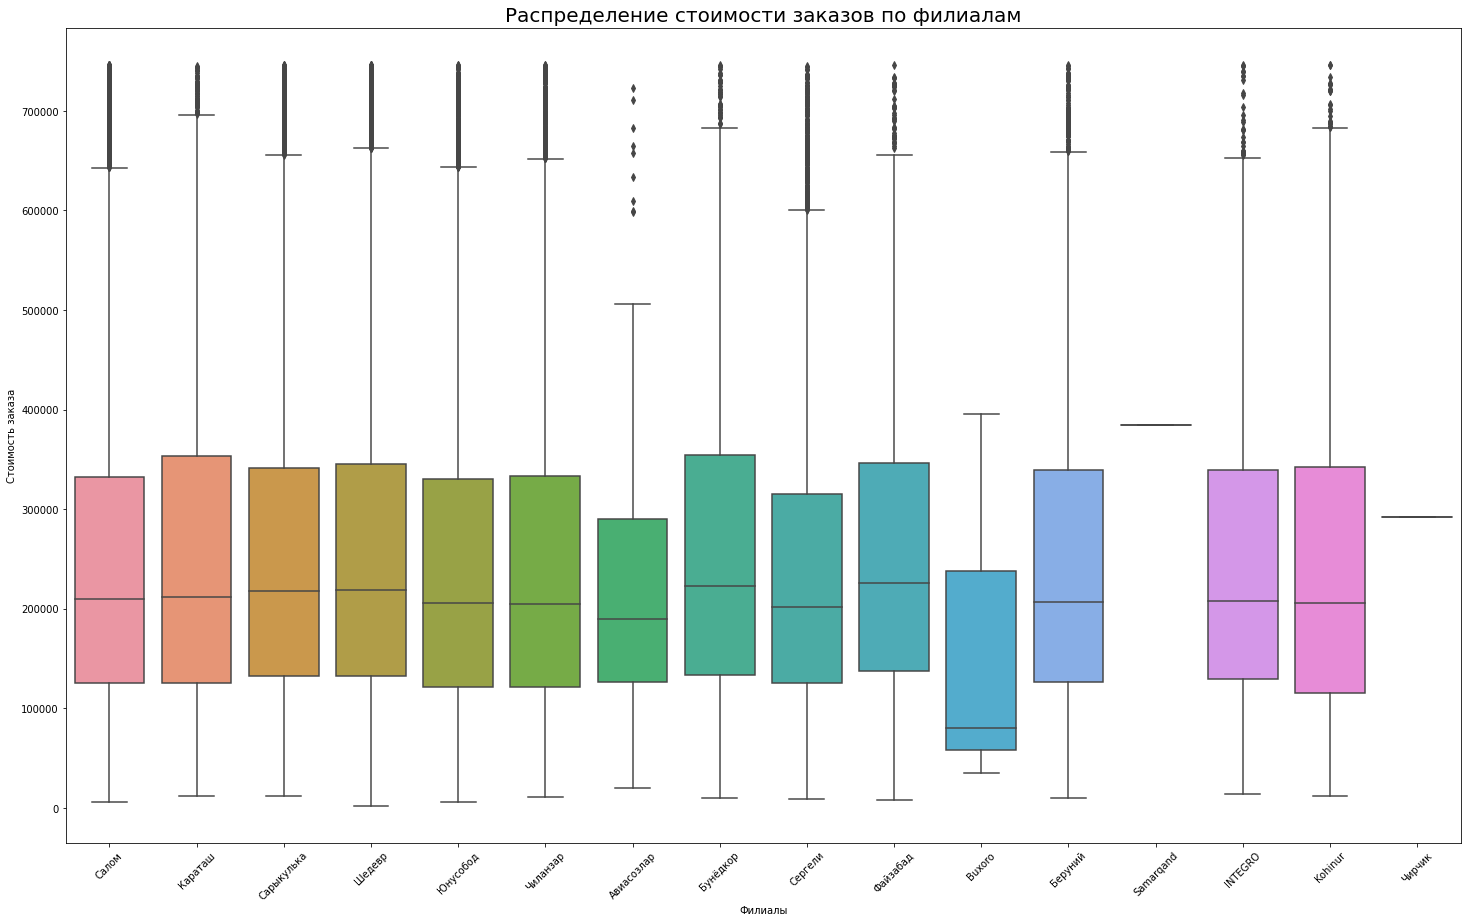

In [74]:
box_plot('filial', 'филиалам', 'Филиалы')

Более плотно стоимости заказов распределены в филиале Буденкор: 75% чеков выше других, и средний чек выше остальных.

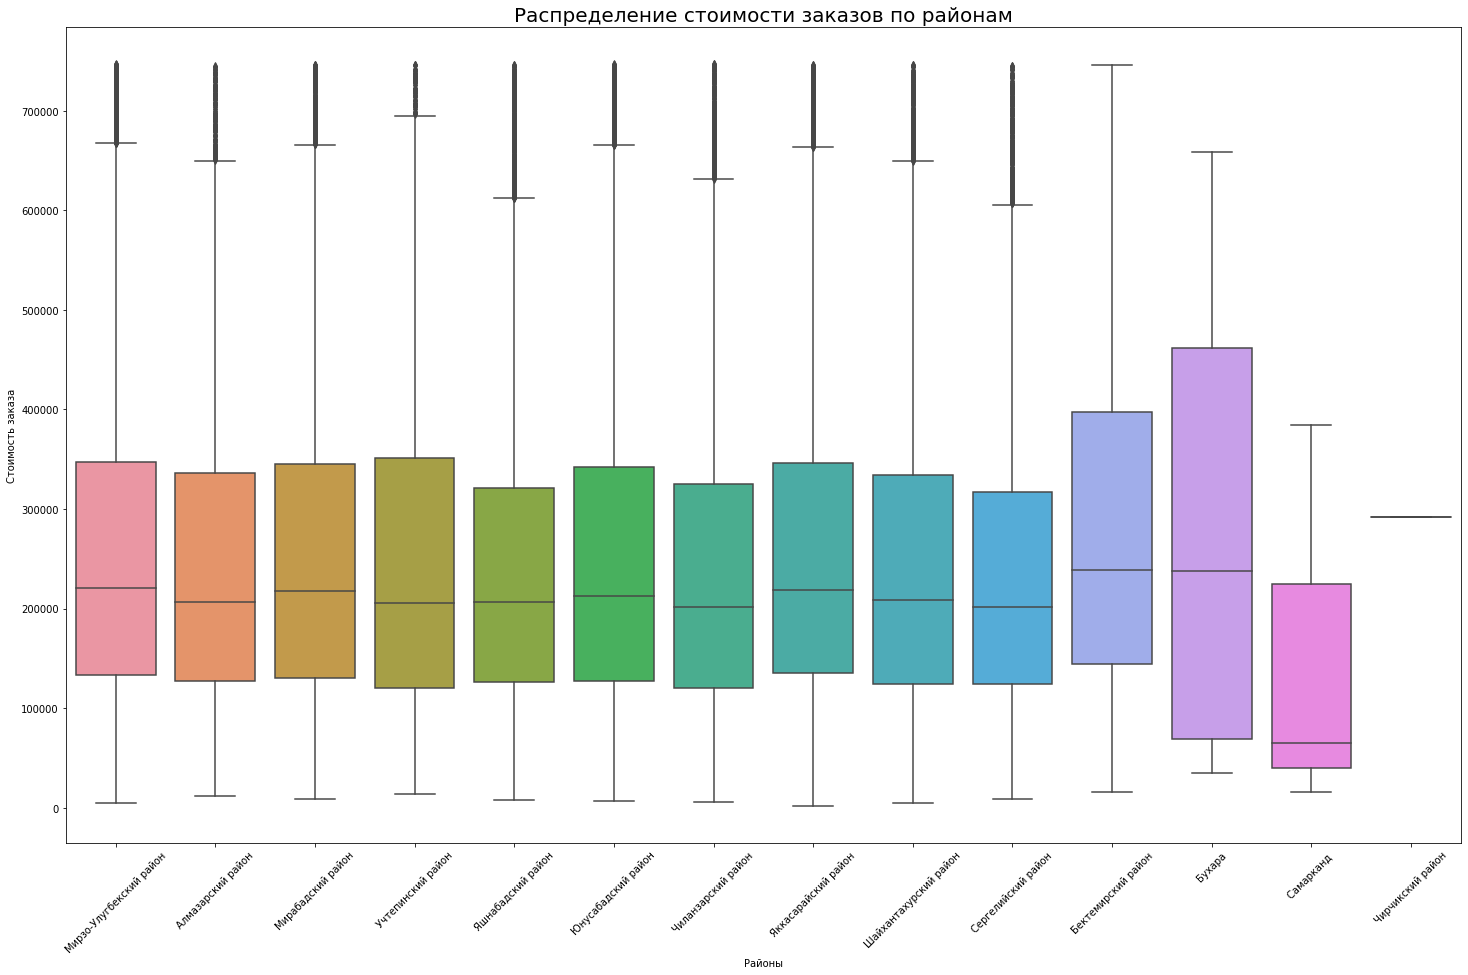

In [75]:
#Посмотрим распределение чеков по районам
box_plot('district', 'районам', 'Районы')

Самый большой разброс в чеках в Бухаре.

В Ташкенте по районам больше всего разброс в Бектемирском районе, но средний чек выше остальных, а 75% заказов выше, чем в других районах. Этот район удален от центра, возможно причиной является удаленность от инфраструктуры, поэтому жители заказывают больше продуктов.

Плотнее всего стоимость заказов сосредоточена в Яшнабадском районе, но средний чек там не самый высокий.

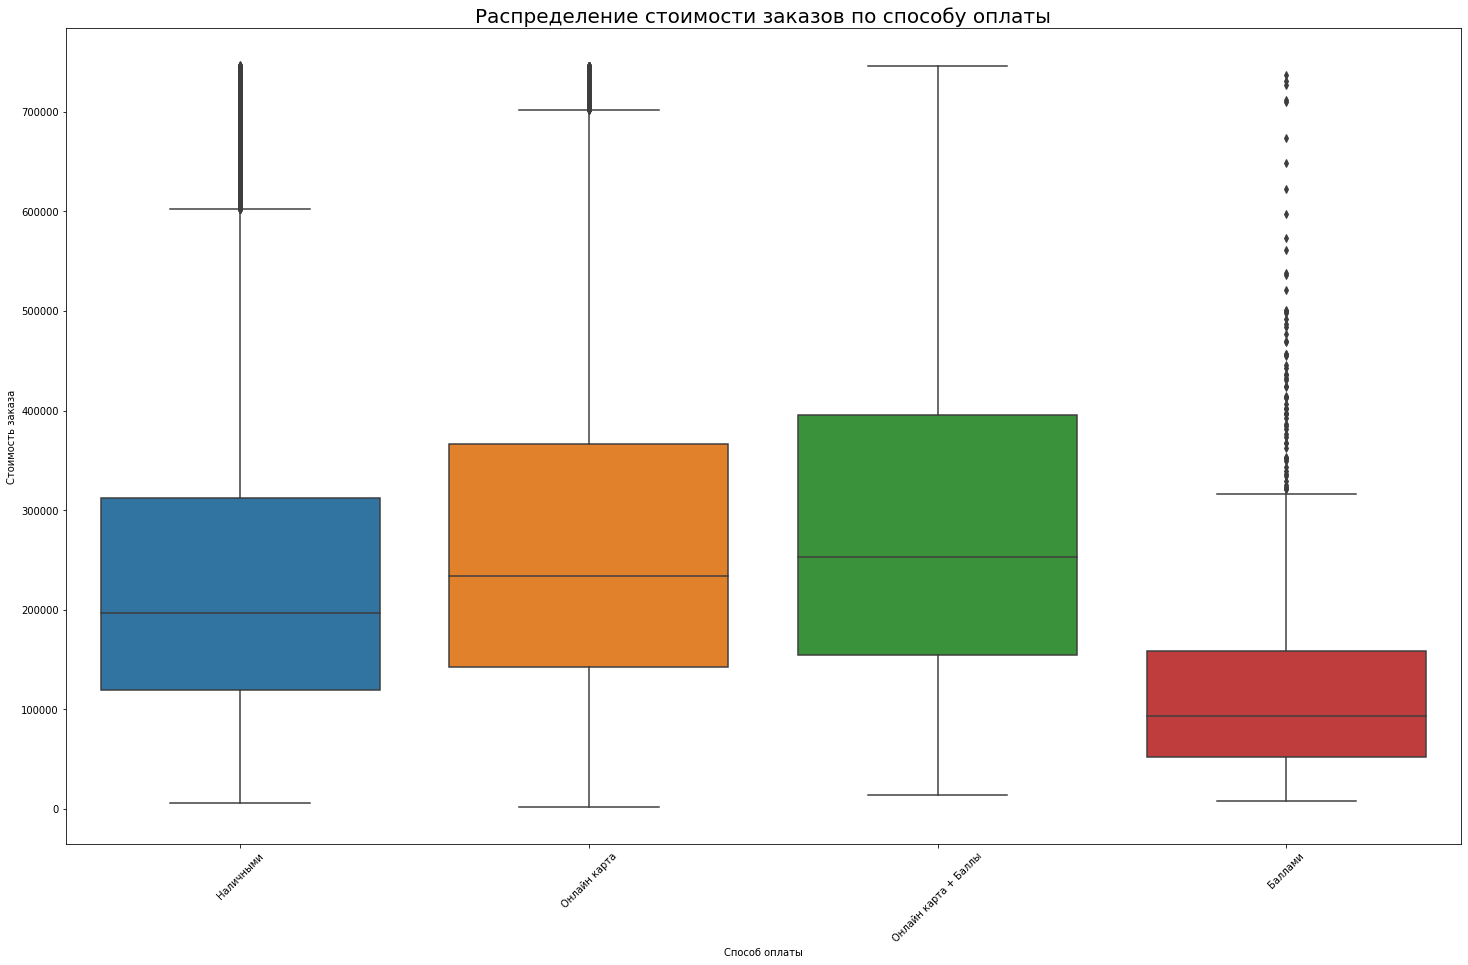

In [76]:
#Посмотрим распределение чеков по способу оплаты
box_plot('payment_type', 'способу оплаты', 'Способ оплаты')

Когда пользователи оплачивают баллами и картой, то их средний чек выше. Плотнее всего оплаты сосредочены в наличных, но средний чек ниже тех, кто оплачивает картой.

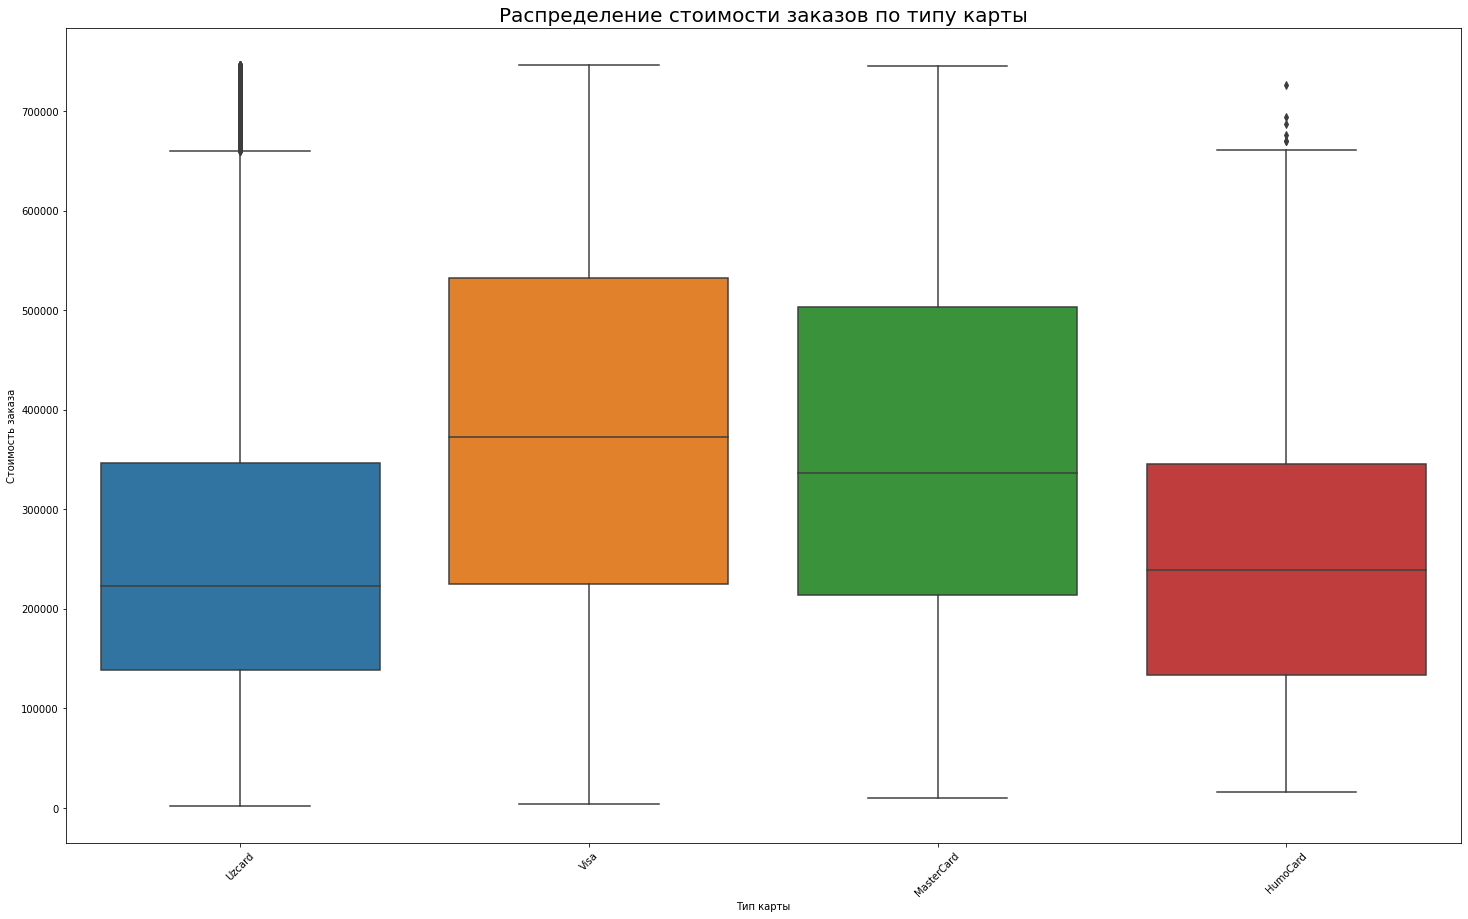

In [77]:
#Посмотрим распределение чеков по типу карты
box_plot('card_type', 'типу карты', 'Тип карты')

Плотнее всего стоимость заказов распределена у HumoCard - пользователи стабильнее остальных оплачивают покупки на сумумму близкую к среднему чеку.

В вот средний чек выше у Visа, хотя распределение более свободное.

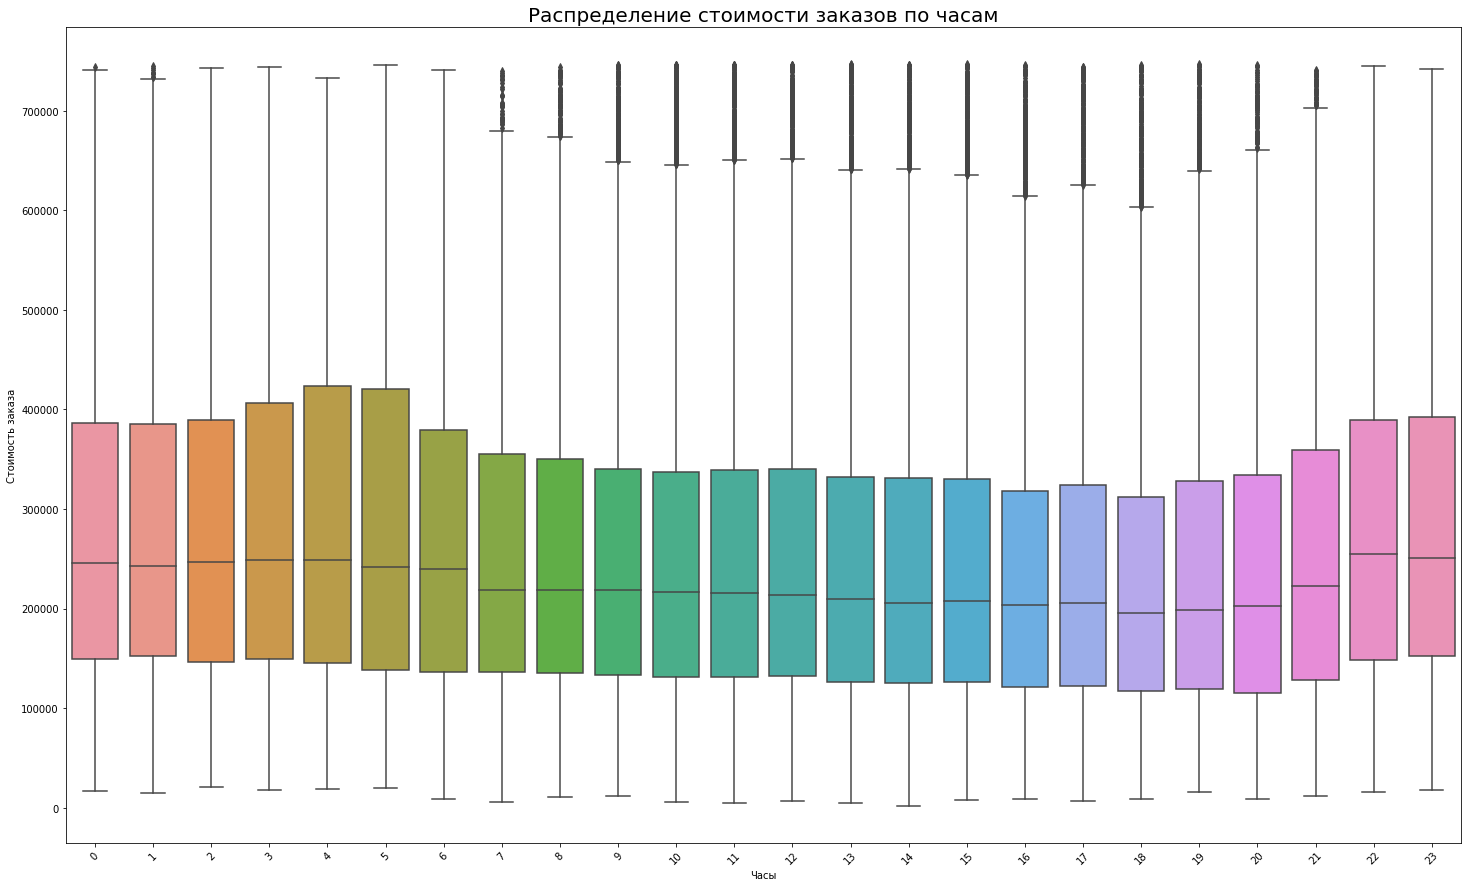

In [78]:
#Посмотрим распределение чеков по времени заказа
box_plot('hour', 'часам', 'Часы')

Выше остальных средние чеки при заказе в 22 и 23 часа. Вероятно, пользователи осознанно планируют список продуктов. 

Плотнее остальных чеки распределены в 17 часов — вероятно, пользователи стабильно покупают продукты на ужин и возможно заказывают почти одно и тоже. 

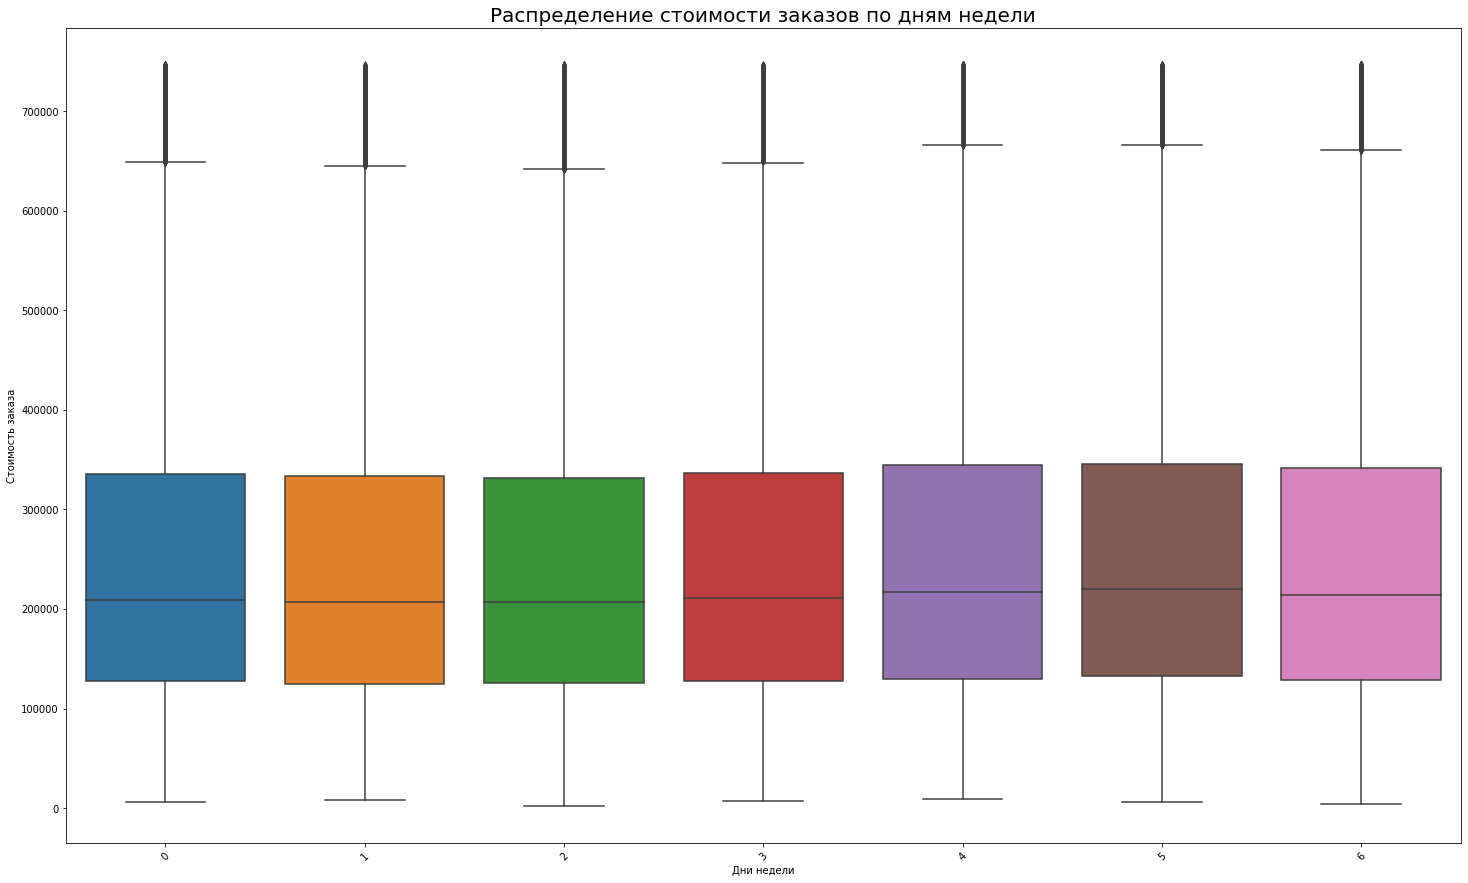

In [79]:
#Посмотрим распределение стоиомстей заказов по дням недели
orders_21['weekday'] = orders_21['dt_create_order'].dt.weekday
box_plot('weekday', 'дням недели', 'Дни недели')

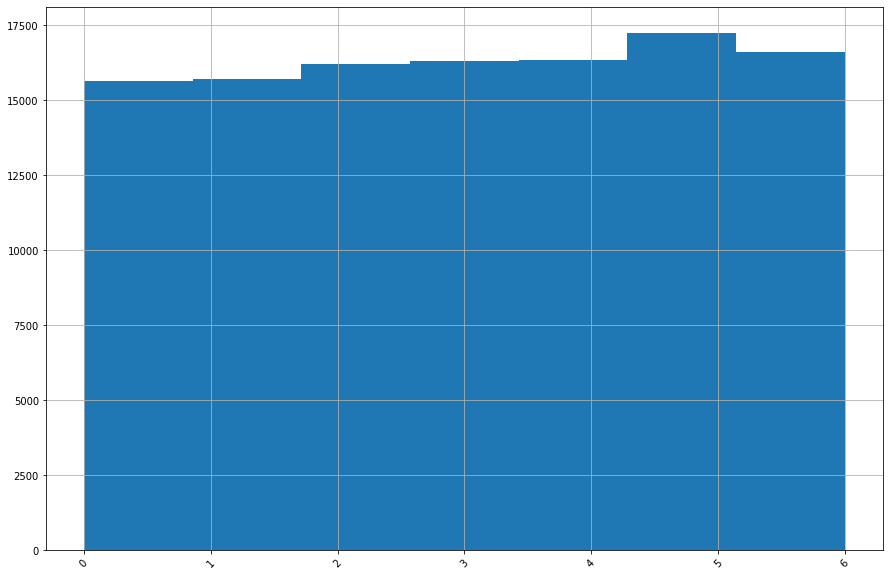

In [80]:
hist('weekday', 7)

Данные по дням недели почти не отличаются. Больше всего заказов в субботу. Меньше всего в понедельник.

#### Анализ удержания пользователей по категориям стоимостей заказов

In [81]:
print(np.percentile(orders_21['total_price_receipt_sums'], [25,40, 60, 75, 100]))

[128246.36 176962.4  255108.2  338765.03 746514.66]


Сформируем категории стоимостей:

 - А - заказы стоимостью меньше 133909 сумов
 - B - заказы стоимостью меньше 176963 сумов
 - C - заказы стоимостью меньше 255109 сумов
 - D - заказы стоимостью меньше 338766 сумов
 - E - заказы стоимостью меньше 746515 сумов

In [82]:
#Добавим столбец с категорией
def categorize_price_receipt(row):
    if row < 133909:
        return 'A'
    elif row >= 133909 and row <176963:
        return 'B'
    elif row >= 176963 and row <255109:
        return 'C'
    elif row >= 255109 and row <338766:
        return 'D'
    elif row >= 338766:
        return 'E'
    

In [83]:
orders_21['category_receipt'] = orders_21['total_price_receipt_sums'].apply(categorize_price_receipt)
orders_21.head()

,order_number,filial,platform,order_score,status,dt_create_order,tm_create_order,tm_accept_order,delivery_type,dt_delivery_suitable,tm_delivery_suitable,tm_fact_delivery,delay,payment_status,payment_type,card_type,total_price_sums,total_price_receipt_sums,min_price_delivery_sums,payment_stripe_dl,payment_octo_sums,total_payment_card,dt_receipt,id_collector,id_deliveryman,id_client,district,id_district,hour,hour2,month,weekday,category_receipt
0,473851,Салом,Win32,0,Доставлено,2021-01-01,1900-01-01 02:52:00,1900-01-01 08:32:00,По расписанию,2021-01-02,1900-01-01 15:00:00,1900-01-01 13:23:00,-96,Оплачен,Наличными,NaN,178330,184730,15000,0,0,0,2021-01-02 12:51:00,6,18,2996805460517,Мирзо-Улугбекский район,3995740614019,2,15,1,4,C
1,473853,Караташ,Android,0,Доставлено,2021-01-01,1900-01-01 09:56:00,1900-01-01 08:17:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 10:55:00,-64,Оплачен,Онлайн карта,Uzcard,150390,150690,15000,0,0,185780,2021-01-02 10:11:00,13,10,2996709564593,Алмазарский район,3995612752787,9,12,1,4,B
2,473854,Салом,iOS,0,Доставлено,2021-01-01,1900-01-01 10:06:00,1900-01-01 10:30:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 11:59:00,0,Оплачен,Онлайн карта,Uzcard,144180,144180,15000,0,0,145680,2021-01-02 11:20:00,6,11,2996710516916,Мирзо-Улугбекский район,3995614022551,10,12,1,4,B
3,473855,Салом,MacIntel,0,Доставлено,2021-01-01,1900-01-01 10:06:00,1900-01-01 13:13:00,По расписанию,2021-01-02,1900-01-01 18:00:00,1900-01-01 16:21:00,-98,Оплачен,Онлайн карта,Uzcard,376038,375738,15000,0,0,422350,2021-01-02 15:33:00,9,18,2996700975179,Мирзо-Улугбекский район,3995639915495,10,18,1,4,E
4,473857,Сарыкулька,iOS,4,Доставлено,2021-01-01,1900-01-01 11:30:00,1900-01-01 08:43:00,По расписанию,2021-01-02,1900-01-01 12:00:00,1900-01-01 11:13:00,-46,Оплачен,Онлайн карта,Visa,498663,498584,15000,0,533882,533882,2021-01-02 11:02:00,14,22,2759620043621,Мирабадский район,3995639854775,11,12,1,4,E


In [84]:
def retention_rate(data, dimensions, m):
#Выделим первое посещение пользователя
    dt_first = data.groupby('id_client').agg({'dt_create_order': 'min'})
    dt_first['dt_create_order'] = dt_first['dt_create_order'].dt.month
    dt_first = dt_first.rename(columns={'dt_create_order': 'month_first_order'})

#Выделим даты заказов
    clients_orders = data[['id_client', 'dt_create_order', dimensions]]
    clients_orders['dt_create_order'] = clients_orders['dt_create_order'].dt.month
    clients_orders = clients_orders.rename(columns={'dt_create_order': 'month_order'})    

#Объеденим таблицы для рассчета livetime
    clients_orders = clients_orders.merge(dt_first, on='id_client', how='left')   

#Высчитываем lifetime для пользователей
    clients_orders['lifetime'] = (
        clients_orders['month_order'] - clients_orders['month_first_order']
    )
    
    clients_orders = clients_orders.query('month_first_order == @m')
    
#Строим таблицу удержания
    result_grouped = clients_orders.pivot_table(
        index=[dimensions, 'month_first_order'],  
        columns='lifetime',
        values='id_client',
        aggfunc='nunique',
    )
    
#Считаем размеры когорт
    cohort_sizes = (
        clients_orders.groupby(dimensions)
        .agg({'id_client': 'nunique'})
        .rename(columns={'id_client': 'cohort_size'})
    )

#Объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    
    
    return result_grouped

In [85]:
#Строим криву по месяцу с разбивной по стоимости заказа
def retention_rate_plot(data, text_month):
    data = data.drop(columns=['cohort_size'])
    data.T.plot(grid=True, xticks=list(data.columns.values), figsize=(15, 5))
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания с разбивкой по стоимости чека ' + text_month)
    
    return plt.show()

In [86]:
pd.reset_option('display.float_format')
retention_rate_receipt_march = retention_rate(orders_21, 'category_receipt', 3)
retention_rate_receipt_march

,cohort_size,0,1,2,3,4,5,6,7,8,9
category_receipt,,,,,,,,,,,
A,1.0,0.750999,0.187750,0.169108,0.141145,0.117177,0.083888,0.087883,0.098535,0.083888,0.074567
B,1.0,0.508600,0.206388,0.171990,0.147420,0.142506,0.090909,0.113022,0.130221,0.105651,0.095823
C,1.0,0.549696,0.212982,0.174442,0.186613,0.180527,0.129817,0.148073,0.137931,0.131846,0.119675
D,1.0,0.462338,0.220779,0.181818,0.150649,0.181818,0.140260,0.122078,0.153247,0.124675,0.142857
E,1.0,0.653580,0.260970,0.219400,0.200924,0.189376,0.191686,0.163972,0.161663,0.168591,0.193995


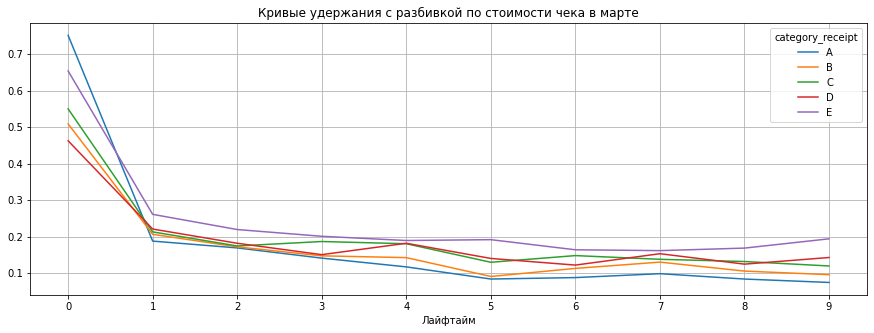

In [87]:
retention_rate_plot(retention_rate_receipt_march, 'в марте')

В мартовской когорте лучше остальных удерживаются пользователи **(E)**, которые покупают от 338766 до 746515, то есть выше среднего чека. 

К концу года второе место по удержанию занимает сегмент пользователей **(D)**, которые покупают от 255109 до 338766. Это так же выше среднего чека.

Пользователи **(С)**, которые покупают продукты на сумму среднего чека +-10%, к концу года занимают 3-е место по удержанию. Но в начале своего лайфтайма удержание выше сегмента D. Этот сегмент пользователей является стабильным, так как в начале и в конце лайфтайма занимает 3е место среди остальных.

In [88]:
retention_rate_receipt_may = retention_rate(orders_21, 'category_receipt', 5)
retention_rate_receipt_may

,cohort_size,0,1,2,3,4,5,6,7
category_receipt,,,,,,,,,
A,1.0,0.815929,0.194690,0.166372,0.111504,0.129204,0.111504,0.086726,0.090265
B,1.0,0.529210,0.230241,0.195876,0.127148,0.175258,0.109966,0.113402,0.113402
C,1.0,0.583587,0.246201,0.252280,0.164134,0.148936,0.151976,0.164134,0.145897
D,1.0,0.470803,0.229927,0.222628,0.149635,0.171533,0.182482,0.145985,0.145985
E,1.0,0.650794,0.241270,0.228571,0.187302,0.187302,0.193651,0.161905,0.180952


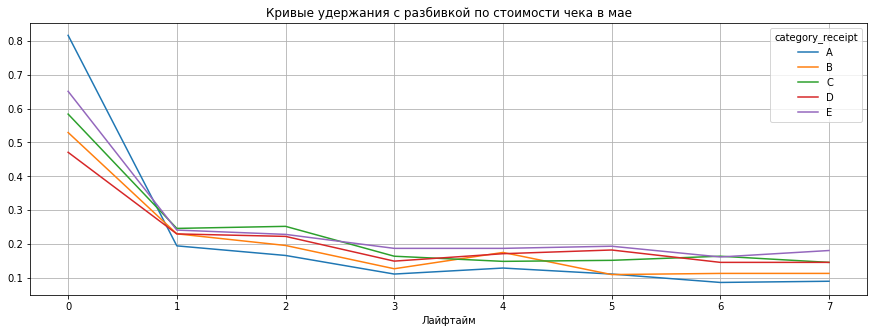

In [89]:
retention_rate_plot(retention_rate_receipt_may, 'в мае')

В майской когорте лучше остальных удерживаются пользователи **(E)**, которые покупают от 338766 до 746515, то есть выше среднего чека. По сравннию с мартом, удержание ниже на 1 процентный пункт.

К концу года второе место по удержанию занимает сегмент пользователей **(D)** и **(С)**. Которые покупают от 255109 до 338766 и от  176963 до 255109, соответственно. Это так же выше среднего чека.

Пользователи **(D)** в начале лайфтайма располагаются на 5м месте по удержанию, но к концу поднимаются на 2е и последние 2 месяца выходят на плато.

In [90]:
retention_rate_receipt_july = retention_rate(orders_21, 'category_receipt', 7)
retention_rate_receipt_july

,cohort_size,0,1,2,3,4,5
category_receipt,,,,,,,
A,1.0,0.829308,0.159420,0.141707,0.130435,0.098229,0.069243
B,1.0,0.672131,0.191257,0.158470,0.117486,0.136612,0.087432
C,1.0,0.667391,0.193478,0.204348,0.136957,0.128261,0.128261
D,1.0,0.620112,0.256983,0.178771,0.162011,0.111732,0.156425
E,1.0,0.741093,0.223278,0.204276,0.171021,0.147268,0.192399


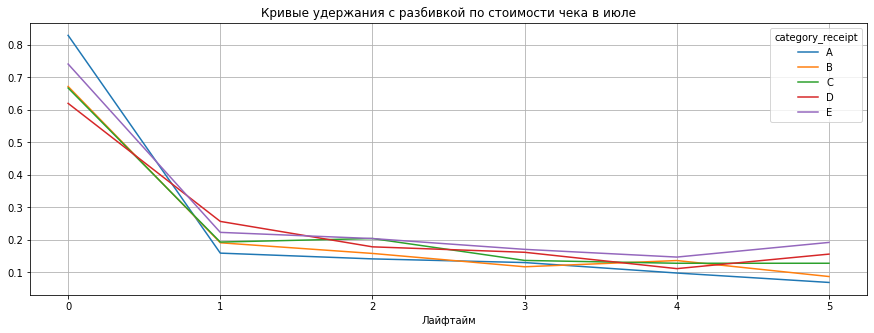

In [91]:
retention_rate_plot(retention_rate_receipt_july, 'в июле')

В июльской когорте лучше остальных удерживаются пользователи **(E)**, которые покупают от 338766 до 746515, то есть выше среднего чека. По сравнению с мартом, удержание ниже на 0,1 процентный пункт — такое же.

К концу года второе место по удержанию занимает сегмент пользователй **(D)**, которые покупают от 255109 до 338766. Это так же выше среднего чека. Так же как и в майской когорте, эта категория стартует с 5го места.

К концу года 3е место по удержанию  занимает сегмент пользователей **(С)**. которые покупают от 176963 до 255109. Это близко к среднему чеку +-10%. Этот сегмент выходит на плато с 3 месяца.


Проверим еще февральскую когорту, чтобы оценить поведение за весь год. Январь нам не подойдет, так как когорта больше остальных в 2 раза.

In [92]:
retention_rate_receipt_february = retention_rate(orders_21, 'category_receipt', 2)
retention_rate_receipt_february

,cohort_size,0,1,2,3,4,5,6,7,8,9,10
category_receipt,,,,,,,,,,,,
A,1.0,0.686420,0.241975,0.201235,0.181481,0.167901,0.154321,0.119753,0.129630,0.132099,0.122222,0.108642
B,1.0,0.446043,0.237410,0.179856,0.179856,0.167266,0.154676,0.118705,0.151079,0.100719,0.097122,0.102518
C,1.0,0.471139,0.235569,0.182527,0.195008,0.190328,0.190328,0.110764,0.156006,0.149766,0.124805,0.145086
D,1.0,0.407480,0.263780,0.210630,0.192913,0.173228,0.183071,0.137795,0.143701,0.125984,0.155512,0.143701
E,1.0,0.603200,0.297600,0.264000,0.235200,0.198400,0.204800,0.182400,0.187200,0.211200,0.190400,0.224000


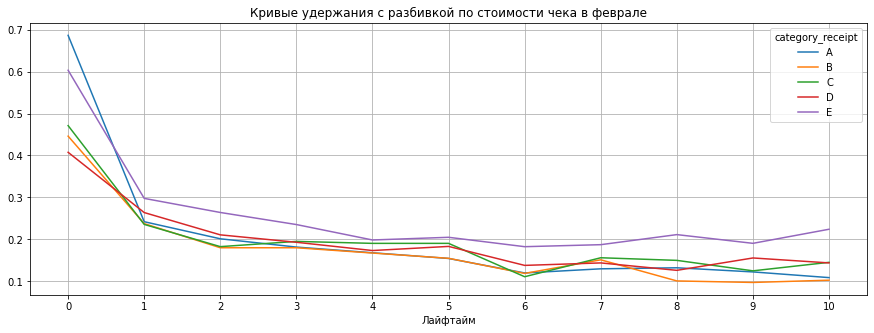

In [93]:
retention_rate_plot(retention_rate_receipt_february, 'в феврале')

К концу года стальбино лучше всех сегмент **E**.

Сегмент **D** так же оказывается на втором месте. А сегмент **C** тоже занимает второе местно, но отличается от сегмента D, тем что его удержание менее плавное, есть резкие спады.

**Вывод**

Чем выше стоимость заказа, тем лучше удержание. Пользователи которые заказывают на сумму среднего чека и выше остаются лояльными сервису.



## Общий вывод и рекомендации 

Много пропусков в столбце в оценками заказа — 77%. Вопрос, **почему люди не ставят оценки для дальнейшего глубокого анализа?** Когда пользователь оценивает опыт взаимодействия, у него формируется лояльность к продукту.

Самая большая когорта - январская. Лучше всего удерживаются пользователи этой когорты. Необходимо проанализировать маркетинговые актвности за этот месяц, что бы понять что спобособствовало приходу такого количества пользователей.
**Возможные** причины высокого удержания:
- высокий сервис обслуживания в первые дни нового года, который усиливает человеческий фактор (жить с комфортом).
- вероятно пользователи получили бонусы за использование приложения в январе, что позволило усилить лояльность в течние года.
- горизон анализа полный год, а значит, пользователи попали под все маркетинговые активности, что так же повлияло на их лояльность.

На второй месяц использования мартовская когорта является 3-й по удержанию (31.02%), а к концу года 5-й. К концу года всего 16,55% пользователей остались пользовователями приложения.
 
На второй месяц использования майская когорта является 6-й по удержанию(27,46%), а к концу года 8-й. Количество пользователей сокращается равномернее, чем в марте. К концу года 15,27% пользователей продолжают использовать приложение.

Пользователи, пришедшие в июле имеют один из самых низкий процентов удержания среди остальных когорт. На второй месяц 24,62%, на последний 14,82% - ниже только у июньской когорты.

В целом под гонец года активность падает. Помесячные показатели удержания с марта по ноябрь отличаются друг от друга: от 1,5 до 5 процентных пунктов. В сравнении с этим январь и февраль почти в 2 раза выше.Вероятно это связано с количеством пользователей, которое вначале года было больше.

**Что проанализировать отдельно:**
 - воронку пользователей в приложении: барьеры в покупке, сложность интерфейса, взаимосвязь с качетсвом заказов.
- маркетинговые активности: 
    - Почему вначале года пришло почти в 5 раз больше пользователей, чем в конце?
    - С чем связано падение новых пользователей в мае и с августа по декабрь?
    
В филиале **Буденкор** чеки выше, чем в других филиаланах в 75%. **Необходимо проанализировать аудиторию пользователей** этого филиала: что заказывают, как часто и тд.

Заказы, которые доставляют в 

Пользователи, которые заказывают в районе 17 часов, выбирают продукты в примерно одинаковую стоимость. Возможно заказывают на ужин.

Пользователи, которые заказывают вечером в 22/23 часа, собирают заказы подороже. Вероятно продукты на завтрак, обед и ужин.

В Бектемирском районе стоимость заказов выше, чем в других районах. **Необходимо проанализировать аудиторию пользователей** этого района: что заказывают, как часто и тд.


Пользователи были разделены на 5 сегментов по стоимости заказов:
- А - заказы стоимостью меньше 133909 сумов
- B - заказы стоимостью меньше 176963 сумов
- C - заказы стоимостью меньше 255109 сумов
- D - заказы стоимостью меньше 338766 сумов
- E - заказы стоимостью меньше 746515 сумов

Лучше остальных удерживается сегмент Е.
Далее идут D и С. 

Сегмент С более стабильный, так как у него соотношение удержания к другим сегментам в основном сохраняется. 

Таким образом, чем выше стоимость заказа, тем выше удержание пользователей.

Основой сегмент Е, дополнительные D,C.

**Рекомендации:**
1. Возможно пользователям не хватает стимуляции: пуши с **акционными предложениями только в приложении.** 
2. Можно возвращать пользователей за счет геймефикации, например, получи бонус дня или собери фишки.
3. Думать каждый день, что приготовить — самая большая морока при заказе продуктов. В приложении на главной можно добавить рецепты блюд. А ингредиенты использовать для продвижения акций на товары. Это позволит простимулировать пользователей купить продукты и упростить себе жизнь — позитивный опыт взаимодействия.
4. Повышать средний чек. Можно вводить акции на 1+1 со скидкой. Ввести бонусы за определнную сумму заказа: подарок или бесплатная доставка, например.
5. Для стимулирования оценок и отзывов при сборе заказа можно класть флаер с напоминанием о том, что сервису важна обратная связь и сразу QR-код на этот раздел в приложении.


Презентация: <https://disk.yandex.ru/i/eCSwDkpnci_qrQ>